# Zestaw 3. Aproksymacja

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import cos, sin, floor

## 1. Metoda najmniejszych kwadratów

1. Napisz funkcję, która dla danego zbioru punktów (x, y) ∈ R^2 i funkcji aproksymującej f(x) zwróci wartość błędu φ = mk=0 (y k − f (x k ))

In [2]:
def count_error(points, f):
    error = 0
    for x, y in points:
        error += (y - f(x))**2
    return error

2. Stwórz wykres błędu φ w zależności od różnych wartości parametrów a, b, a ∈ [0, 1], b ∈ [−3, 0] funkcji liniowej f (x) = a ∗ x + b dla zbioru punktów:


In [45]:
points = [(4,2), (7,0), (11,2), (13,6), (17,7)]

a = np.linspace(0, 1, 10)
b = np.linspace(-3, 0, 10)

a_axis = []
b_axis = []
error_axis = []

for A in a:
    for B in b:
        a_axis.append(A)
        b_axis.append(B)
        error_axis.append(count_error(points, lambda x: A*x+B))
        


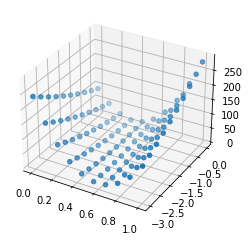

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(a_axis), np.array(b_axis), np.array(error_axis))
plt.show()

3. Napisz funkcję aproksymującą powyższy zbiór punktów funkcją liniową wykorzystując układ normalny. Stwórz wykres prezentujący zbiór punktów i wyliczoną funkcję aproksymującą. Dla wyliczonej funkcji wylicz wartość błędu średniokwadratowego i porównaj go z wynikami z poprzedniego podpunktu. Omów wyniki.

In [47]:
def approximate(points):
    A = np.ones(shape=(len(points), 2))
    B = np.zeros(len(points))
    for i, (x, y) in enumerate(points):
        A[i][0] = x
        B[i] = y
    
    a, b = np.linalg.solve(A.T @ A, A.T @ B)
    func = lambda x: a*x + b
    return func, count_error(points, func)

function, error = approximate(points)
print(f'approximation error: {error}')

approximation error: 10.781007751937986


In [48]:
def plot_approximation(function, points, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot([x[0] for x in points], [y[1] for y in points], marker="o", linestyle=" ", color="lightseagreen")
    xs = np.linspace(min(points, key=lambda x: x[0])[0] - 1, max(points, key = lambda x: x[0])[0] + 1, 100)
    ax.plot(xs, function(xs), color="gold", linewidth=2)

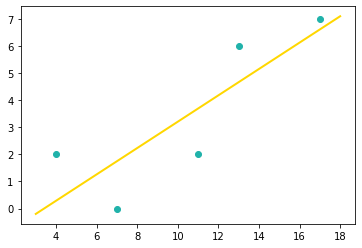

In [49]:
plot_approximation(function, points)

4. Porównaj wyniki z wykresem wielomianu interpolującego powyższe punkty. Jaka jest przewaga aproksymacji?

In [17]:
def interpolate(points, ax=None):
    '''interpolacja dla węzłów xs, o wartościach w węzłach zadanych funkcją f'''
    n = len(points)
    
    def l(x, k):
        result = 1
        for i in range(n):
            if i == k: continue
            result *= (x - points[i][0])
            result /= (points[k][0] - points[i][0])
        return result
    
    def p(x):
        result = 0
        for i in range(n):
            result += points[i][1]*l(x, i)
        return result
    
    if ax is None:
        fig, ax = plt.subplots()
            
    ax.plot([x[0] for x in points], [y[1] for y in points], marker='o', linestyle='', zorder=10, color = 'darkgoldenrod', markersize=8)
    x_axis = np.linspace(min(points, key=lambda x: x[0])[0] - 1, max(points, key = lambda x: x[0])[0] + 1, 100)
    ax.plot(x_axis, p(x_axis), color="mediumseagreen")

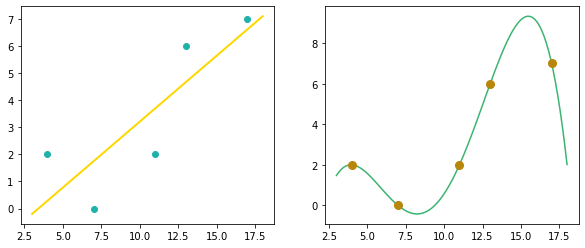

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plot_approximation(function, points, ax[0])
interpolate(points, ax[1])

Dzięki aprokasymacji jesteśmy w stanie zauważyć trend i na jego podstawie przewidywać wartości w innych punktach. Jeśli przypuszcamy, iż funkcja opisująca punkty, ma charakter zbliżony do liniowego, wówczas aproksymacja przynosi więcej cennych informacji od interpolacji.

5. Dodaj do powyższego zbioru danych wartość odstającą, np. (2, 15). W jaki sposób zmieniła się funkcja aproksymująca i jaki jest potencjalny wpływ wartości odstających na aproksymację liniową?

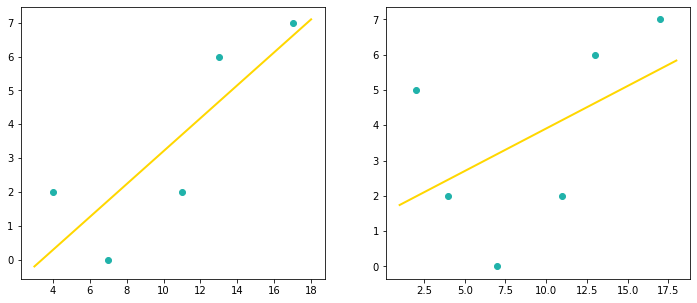

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

points = [(4,2), (7,0), (11,2), (13,6), (17,7)]
plot_approximation(approximate(points)[0], points, ax[0])

points += [(2,5)]
plot_approximation(approximate(points)[0], points, ax[1])

prosta regresji liniowej w znacznym stopniu się zmieniła


#### jak rozwiązać problem
Po znalezieniu prostej, możemy odrzucić punkty, dla których błąd kwadratowy jest największy, a następnie znaleźć nową prostą bez tych punktów.

## 2. Aproksymacja funkcją nieliniową

Napisz funkcję, która dopasuje do danych z poniższej tabeli  funkcjęf(x) =aln(x) +bcos(x)+cexmetodą najmniejszych kwadratów implementując własnoręcznie układ nor-malny  dla  tej  funkcji.  Narysuj  wykres  wyliczonej  funkcji  razem  z  aproksymowanymipunktami. Jakie są ograniczenia na funkcję którą możemy użyć do aproksymacji śred-niokwadratowej?

#### wyprowadzenie macierzy
(...)

In [9]:
points = [(0.24, 0.23), (0.65, -0.26), (1.24, -0.45), (1.73, 0.27), (2.01, 0.1), (2.23, -0.29), (2.52, 0.24), (2.77, 0.56), (2.99, 1.0)]

In [28]:
def nonlinear_approximate(points): 
    '''a*lnx + b*cosx + c*exp(x)'''
    A = np.zeros(shape=(3, 3))
    B = np.zeros(3)

    xs = np.array([x[0] for x in points])
    ys = np.array([y[1] for y in points])

    A[0, 0] = np.sum((np.log(xs))**2)
    A[0, 1] = np.sum(np.log(xs)*np.cos(xs))
    A[0, 2] = np.sum(np.log(xs)*np.exp(xs))
    B[0] = np.sum(ys*np.log(xs))

    A[1, 0] = np.sum(np.log(xs)*np.cos(xs))
    A[1, 1] = np.sum(np.cos(xs)**2)
    A[1, 2] = np.sum(np.cos(xs)*np.exp(xs))
    B[1] = np.sum(ys*np.cos(xs))    
    
    A[2, 0] = np.sum(np.log(xs)*np.exp(xs))
    A[2, 1] = np.sum(np.cos(xs)*np.exp(xs))
    A[2, 2] = np.sum(np.exp(xs)**2)
    B[2] = np.sum(ys*np.exp(xs))

    a, b, c = np.linalg.solve(A, B)
    return a, b, c




In [29]:
nonlinear_approximate(points)

(-0.7348670505702516, -0.8086389850515094, 0.03550327360683473)

In [30]:
def plot_nonlinear_approximation(points):
    a, b, c = nonlinear_approximate(points)

    fig, ax = plt.subplots()
    ax.plot([x[0] for x in points], [y[1] for y in points], linestyle=" ", marker="o", color="darkblue")

    x_axis = np.linspace(min(points, key=lambda x: x[0])[0],
                        max(points, key=lambda x: x[0])[0],
                        200)

    y_axis = a*np.log(x_axis) + b*np.cos(x_axis) + c*np.exp(x_axis)
    ax.plot(x_axis, y_axis, color="lightblue", linewidth=3, zorder=0)


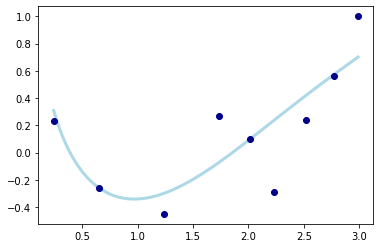

In [31]:
plot_nonlinear_approximation(points)

#### jakie są ograniczenia na funkcję którą możemy użyć do aproksymacji śred-niokwadratowej?

## 3. Przybliżenie Padé

Zaimplementuj funkcję która dla funkcji f(x) =e−x wylicza przybliżenie Pad ́e dla za-danych parametrów m i n. Zauważ, że pochodne funkcji f(x) są proste do wyliczenia analitycznie. Wypisz wyliczone współczynniki funkcji wymiernej. Zaprezentuj na wykresie funkcję f oraz jej wyliczoną aproksymację.

In [133]:
def pade_approximate(m, n):
    '''f(x) = exp(-x)'''
    N = m + n 
    a_s = np.ones(N+1)
    for i in range(1, N+1):
        a_s[i] = a_s[i-1]/i

    A = np.zeros(shape=(N, N))
    B = np.zeros(N)

    for i in range(1, N+1):
        if i <= n:
            A[i-1, i-1] = 1
        for j in range(1, i+1):
            if j <= m:
                A[i-1, n+j-1] = -a_s[i-j]

        B[i-1] = a_s[i]
    
    result = np.linalg.solve(A, B)
    qs = result[:n]
    ps = result[n:]
    return ps, qs

In [135]:
ps, qs = pade_approximate(3, 2)
print(f'p: 1 {" ".join(map(lambda x: str(round(x, 2)), ps))}')
print(f'q: 1 {" ".join(map(lambda x: str(round(x, 2)), qs))}')

p: 1 -0.6 0.15 -0.02
q: 1 0.4 0.05


In [136]:
def plot_pade_approximation(m, n, ax=None):
    if ax is None:
        _, ax = plt.subplots()

    ps, qs = pade_approximate(m, n)

    def pade_function(x, ps, qs):
        nominator = 1
        for i, p in enumerate(ps):
            nominator += p*x**(i+1)

        denominator = 1
        for i, q in enumerate(qs):
            denominator += q*x**(i+1)
        
        return nominator/denominator


    x_axis = np.linspace(-5, 50, 200)
    ax.plot(x_axis, np.exp(-x_axis), color="plum")

    ax.plot(x_axis, list(map(lambda x: pade_function(x, ps, qs), x_axis)), color="indigo")




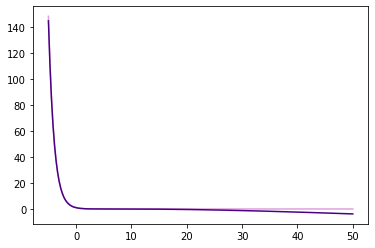

In [140]:
plot_pade_approximation(5, 4)

In [120]:
# wnioski: po co? jakie zalety? czym się różni od innych rozwiązań?

M. Hawryluk 06.04.2021